In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [4]:
#E:\Pattern Recognition\DigitRecognizer\data


images = np.load('/mnt/e/Pattern Recognition/DigitRecognizer/data/images.npy')
labels = np.load('/mnt/e/Pattern Recognition/DigitRecognizer/data/labels.npy')

In [5]:
pd.value_counts(pd.Series(labels))

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

Correct label for this number is 5


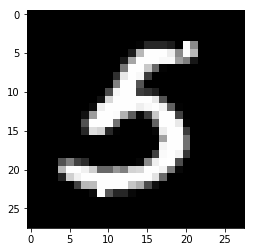

In [6]:
plt.imshow(images[679,:,:], cmap='gray')
print('Correct label for this number is {}'.format(labels[679]))

In [7]:
print(type(images))
print(np.amin(images))
print(np.amax(images))
print(images[679,:,:].dtype)
print(np.shape(images))

<class 'numpy.ndarray'>
0.0
255.0
float32
(60000, 28, 28)


#### Next step is to transfer dtype into uint8
#### Then create a negative variant of array 

In [8]:
#transfere everything to uint8 

im = np.empty(np.shape(images), dtype = 'uint8')
im[:,:,:] = images[:,:,:]

In [9]:
#create negative array

neg = np.empty(np.shape(im), dtype = 'uint8')
neg[:,:,:] = 255-images[:,:,:]

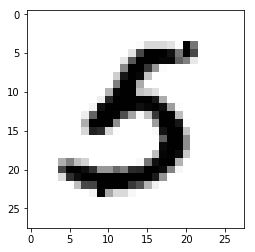

In [10]:
plt.imshow(neg[679,:,:], cmap='gray')

#### Next step is to make thresholding of the image, in this case all pixels > than 100 will be black and < than 100 will be white

In [11]:
thresh = np.empty(np.shape(neg), dtype='uint8')
thresh[neg < 100] = 0 #black
thresh[neg > 100] = 255 #white

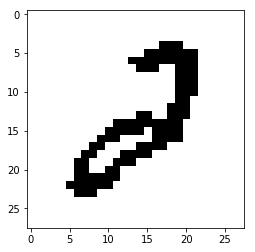

In [12]:
plt.imshow(thresh[555,:,:], cmap = 'gray')

#### Exercises with resursion

In [13]:
#digit example

def count_to_zero(n):
    
    print(n)
    if n == 0:
        print('That is all ... zero ...')
        return 0
    count_to_zero(n-1)
    
count_to_zero(10)

10
9
8
7
6
5
4
3
2
1
0
That is all ... zero ...


In [72]:
# flood fill 

#A[y,x]
#reagion i = background
#region y = black pixels
new_A = np.zeros([28,28], dtype='uint8')

def flood_fill(A, x, y, A_n): 
    
    while x <28 and y<28:
        
        print(A[y][x])    
        
        if A[y][x] == 0:
            print('we are {} here'.format(str(y,x)))
            A_n[y][x] =  0 #figure conture
            print('zero assigned to coordinates {}'.format(str(y,x)))
        
       
    
        flood_fill(A, x+1, y,   A_n) #right
        flood_fill(A, x-1, y,   A_n) #left
        flood_fill(A, x,   y+1, A_n) #up
        flood_fill(A, x,   y-1, A_n) #down
    
      
flood_fill(im, 0, 0, new_A)       
    




    

255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


RecursionError: maximum recursion depth exceeded while calling a Python object

In [71]:
new_A

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 